In [1]:
import xarray as xr
import numpy as np
import glob
import time

In [2]:
import sys
sys.path.insert(0,'/home/alberta/lib/python/xscale')
import xscale

In [3]:
sys.path.insert(0,'/home/alberta/lib/python/PowerSpec')
import PowerSpec as ws


In [4]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib


In [5]:
datadir = '/mnt/alberta/equipes/IGE/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/curl/'
dst=xr.open_dataset(datadir+'NATL60-CJM165_y2013m03d15.1d_curloverf.nc') 


In [6]:
interp = 'basemap'
def compute_spectrum(var):
    data = var.squeeze()
    pspec,kstep = ws.wavenumber_spectra(data,zlon,zlat)
    return pspec, kstep

In [7]:
import matplotlib.pyplot as plt

rad2cyc = 1.E3 / np.pi / 2. 

def nice_spectrum(spectre_full,spectre_hp,spectre_lp,title,figname):
    fig, axarr = plt.subplots(1,1)
    fig.set_figheight(8)
    fig.set_figwidth(15)
    #
    pspec,kstep = spectre_full
    pspec_lp,kstep_lp = spectre_lp
    pspec_hp,kstep_hp = spectre_hp
    skpspec = pspec * rad2cyc
    skpspec_lp = pspec_lp * rad2cyc
    skpspec_hp = pspec_hp * rad2cyc
    axarr.plot(skpspec[1:],kstep[1:], 'k-', lw=3, label='Full relative vorticity')
#    axarr.plot(skpspec_lp[1:],kstep_lp[1:], 'r-', lw=3, label='Low passed relative vorticity f=0.0125 n=80')
    axarr.plot(skpspec_hp[1:],kstep_hp[1:], 'b-', lw=3, label='Full - Low passed  f=0.05 n=30')
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_title('',fontsize=20)
    axarr.grid(True,which='both',ls='-')
    axarr.axis('tight')
    axarr.legend(loc="lower left", fontsize=25)
    axarr.tick_params(labelsize=25)
    plt.title(title, fontsize=25)
    plt.savefig(figname)



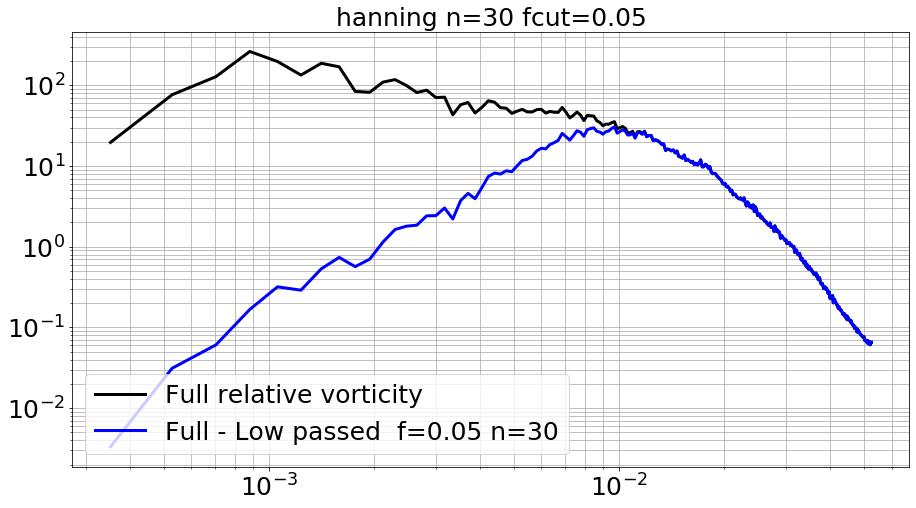

In [9]:
def filt(w):
    win_box2D = w.window
    win_box2D.set(window='hanning', cutoff=20, dim=['x', 'y'], n=[30, 30])
    bw = win_box2D.boundary_weights(drop_dims=[])
    w_LS = win_box2D.convolve(weights=bw)
    w_SS=w-w_LS
    return w_SS
temp=dst.socurloverf[0]
navlon=dst.nav_lon
navlat=dst.nav_lat
tprime=filt(temp)
zfull = temp[600:1200,1800:2400].values
zhp = tprime[600:1200,1800:2400].values
zlon=navlon[600:1200,1800:2400].values
zlat=navlat[600:1200,1800:2400].values
zlp = zfull - zhp
interp = 'basemap'
def compute_spectrum(var):
    data = var.squeeze()
    pspec,kstep = ws.wavenumber_spectra(data,zlon,zlat)
    return pspec, kstep

spectre_full = compute_spectrum(zfull)
spectre_hp   = compute_spectrum(zhp)
spectre_lp   = compute_spectrum(zlp)

nice_spectrum(spectre_full,spectre_hp,spectre_lp,'hanning n=30 fcut=0.05',"spectrum_total_filtered_curlsurf_hanning_fc0.05_window30.png")
